In [1]:
from numpy.random import choice

def get_range(value, variance):
    max = value * (1 + variance)
    min = value * (1 - variance)

    sampleList = [min, value, max]
    randomNumberList = choice(
        sampleList, 100, p=[0.25, 0.5, 0.25]
    )

    return randomNumberList

weighted_list = get_range(0.035, 0.1)
weighted_list

array([0.0385, 0.035 , 0.035 , 0.035 , 0.0385, 0.035 , 0.0385, 0.035 ,
       0.0385, 0.035 ])

In [7]:
import random
rate = random.choices(
    population=[0.03, 0.05, 0.07, 0.09, 0.11],
    weights=[0.1, 0.2, 0.2, 0.2, 0.1],
    k=1
)
rate

[0.09]

In [29]:
from numpy.random import choice
import numpy as np
import random

class Calculator():
    def calculate_growth(initial_value, rate, years):
        initial_value = float(initial_value)
        rate = float(rate)
        years = float(years)
        value = initial_value * (1 + rate) ** years
        return round(value)
    

class MonteCarlo():
    def __init__(self, runs, config):
        self.results = []
        self.initial_value = config.get('initial_value')
        self.rate = config.get('rate')
        self.years = config.get('years')
        self.run_count = runs

    def get_rate(self, base_rate):
        mean_rate = 0.08548
        st_dev = 0.19294
        rate = random.choices(
            population=[mean_rate - 2*st_dev, mean_rate - st_dev, mean_rate, mean_rate + st_dev, mean_rate + 2*st_dev],
            weights=[0.025, 0.225, 0.5, 0.225, 0.025],
            k=1
        )
        return rate[0]

    def run_simulation(self):
        runs = []
        for _ in range(self.run_count):
            runs.append(self.make_run(self.initial_value))

        summary = self.get_summary(runs)

        return summary

    def make_run(self, initial_value):
        run = [initial_value]
        for _ in range(self.years):
            rate = self.get_rate(self.rate)
            initial_value = Calculator.calculate_growth(initial_value, rate, 1)
            run.append(initial_value)

        return run

    def get_summary(self, runs):
        totals = [run[-1] for run in runs]
        results = np.array(totals)
        p10 = np.percentile(results, 10)
        p50 = np.percentile(results, 50)
        p90 = np.percentile(results, 90)
        p10_run_total = totals[(np.abs(totals - p10)).argmin()]
        p50_run_total = totals[(np.abs(totals - p50)).argmin()]
        p90_run_total = totals[(np.abs(totals - p90)).argmin()]
        min_run = [run for run in runs if run[-1] == min(totals)][0]
        max_run = [run for run in runs if run[-1] == max(totals)][0]
        p10_run = [run for run in runs if run[-1] == p10_run_total][0]
        p50_run = [run for run in runs if run[-1] == p50_run_total][0]
        p90_run = [run for run in runs if run[-1] == p90_run_total][0]
        
        summary = {
            'p10': p10, 
            'p50': p50, 
            'p90': p90,
            'min_run': min_run,
            'max_run': max_run,
            'p10_run': p10_run,
            'p50_run': p50_run,
            'p90_run': p90_run
        }
        return summary

In [30]:
config = {
    'initial_value': 310000,
    'rate': 0.07,
    'years': 25
}
monte_carlo = MonteCarlo(1000, config)
summary = monte_carlo.run_simulation()
summary

{'p10': 657314.8,
 'p50': 1863663.0,
 'p90': 4845439.2,
 'min_run': [310000,
  396310,
  430187,
  466959,
  416780,
  371993,
  332019,
  296340,
  378847,
  411231,
  367040,
  398415,
  432472,
  302557,
  211669,
  270602,
  345943,
  308768,
  275588,
  245973,
  219541,
  195949,
  174892,
  156098,
  169441,
  151233],
 'max_run': [310000,
  336499,
  495111,
  632960,
  687065,
  613233,
  783969,
  850983,
  1087914,
  1390811,
  1509698,
  2221309,
  2839766,
  3082509,
  3346002,
  4277596,
  4643245,
  5936017,
  6443428,
  8237407,
  8941541,
  7980683,
  8662872,
  11074789,
  14158232,
  18100167],
 'p10_run': [310000,
  276687,
  300338,
  326011,
  416779,
  291579,
  260246,
  232280,
  296951,
  265041,
  236560,
  302423,
  328274,
  356335,
  318043,
  283866,
  308131,
  215568,
  233995,
  299144,
  382432,
  488909,
  530701,
  678459,
  605552,
  657315],
 'p50_run': [310000,
  276687,
  300338,
  326011,
  353878,
  315850,
  403789,
  438305,
  391205,
  4246

In [1]:
rate_history = [
    45.49,
-8.83,
-20.01,
-38.07,
1.82,
48.85,
-2.66,
42.49,
30.06,
-37.13,
32.98,
-1.10,
-11.31,
-20.65,
9.30,
21.47,
16.36,
32.84,
-22.48,
-3.34,
2.63,
20.81,
23.48,
16.68,
17.27,
-1.94,
53.71,
32.10,
4.33,
-12.98,
41.23,
10.15,
-1.01,
25.79,
-10.01,
20.63,
15.30,
10.28,
-12.98,
20.15,
5.82,
-13.60,
-1.90,
10.61,
14.84,
-21.17,
-34.04,
28.11,
18.09,
-12.82,
-2.30,
4.61,
17.08,
-12.51,
15.98,
17.87,
2.11,
26.43,
17.21,
1.32,
11.60,
25.64,
-8.64,
26.36,
4.46,
7.03,
-1.31,
33.80,
18.74,
30.88,
26.30,
17.72,
-12.01,
-13.20,
-23.78,
25.99,
7.25,
1.37,
12.75,
1.35,
-36.61,
22.60,
13.13,
-0.84,
13.91,
30.19,
12.67,
0.64,
9.50,
19.09,
-6.02,
28.28,
16.44,
20.02,
-23.01,
21.97,
21.54,
]

inflation = [
-1.16,
0.58,
-6.40,
-9.32,
-10.27,
0.76,
1.52,
2.99,
1.45,
2.86,
-2.78,
0.00,
0.71,
9.93,
9.03,
2.96,
2.30,
2.25,
18.13,
8.84,
2.99,
-2.07,
5.93,
6.00,
0.75,
0.75,
-0.74,
0.37,
2.99,
2.90,
1.76,
1.73,
1.36,
0.67,
1.33,
1.64,
0.97,
1.92,
3.46,
3.04,
4.72,
6.20,
5.57,
3.27,
3.41,
8.71,
12.34,
6.94,
4.86,
6.70,
9.02,
13.29,
12.52,
8.92,
3.83,
3.79,
3.95,
3.80,
1.10,
4.43,
4.42,
4.65,
6.11,
3.06,
2.90,
2.75,
2.67,
2.54,
3.32,
1.70,
1.61,
2.68,
3.39,
1.55,
2.38,
1.88,
3.26,
3.42,
2.54,
4.08,
0.09,
2.72,
1.50,
2.96,
1.74,
1.50,
0.76,
0.73,
2.07,
2.11,
1.91,
2.29,
1.36,
7.04,
6.45,
3.35,
2.75,
]


In [56]:
results = np.array(inflation)
st_dev = np.std(inflation)
mean = np.mean(inflation)
print(f'mean - {mean}')
print(f'st_dev - {st_dev}')
for percentile in [10, 25, 50, 75, 90]:
    print(f'{percentile} - {np.percentile(results, percentile)}')


mean - 3.110721649484536
st_dev - 3.895495216834011
10 - 0.4960000000000003
25 - 1.5
50 - 2.75
75 - 4.08
90 - 7.70800000000001


In [51]:
(1-(0.5+.025+0.025))/2


0.22499999999999998

In [3]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import scipy
skew = scipy.stats.skew(rate_history)

In [17]:
skewtest = scipy.stats.skewtest(rate_history)

In [26]:
np.quantile(inflation, 0)

-10.27

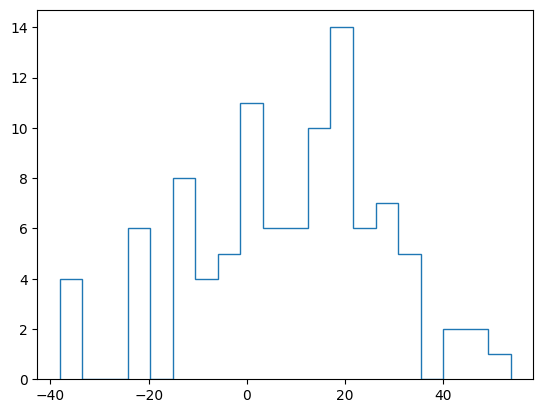

In [14]:
import matplotlib.pyplot as plt
import numpy as np

counts, bins = np.histogram(rate_history, bins=20)
plt.stairs(counts, bins)

In [16]:
from dataclasses import dataclass

@dataclass
class DataClass:
    x: list = []
    y: str = 'y'

d = DataClass(x=inflation, y='x')

ValueError: mutable default <class 'list'> for field x is not allowed: use default_factory

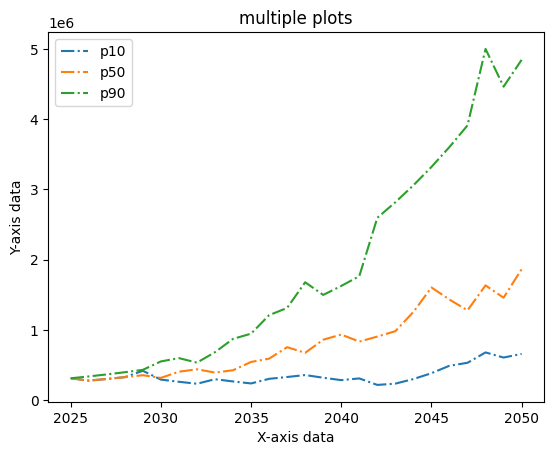

In [41]:
import matplotlib.pyplot as plt

x = list(range(2025, 2026 + config['years']))
# y1 = summary['min_run']
y2 = summary['p10_run']
y3 = summary['p50_run']
y4 = summary['p90_run']
# y5 = summary['max_run']

# plt.plot(x, y1, label ='min')
plt.plot(x, y2, '-.', label ='p10')
plt.plot(x, y3, '-.', label ='p50')
plt.plot(x, y4, '-.', label ='p90')
# plt.plot(x, y5, label ='max')

ax = plt.gca()  # get the axes object
# turn off the offset (on the y-axis only)
ax.ticklabel_format(axis="y", useOffset=False)

# plt.xlabel("X-axis data")
plt.ylabel("Value")
plt.legend()
# plt.title('multiple plots')
plt.show()

In [32]:
range(2025, config['years'])

range(2025, 25)

In [38]:
list(range(2025, 2025 + config['years'] + 1))


[2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2039,
 2040,
 2041,
 2042,
 2043,
 2044,
 2045,
 2046,
 2047,
 2048,
 2049,
 2050]

In [36]:
len(summary['max_run'])

26